# Capstone 4 - Stroke Prediction

<img src = "Stroke+MGN+graphic.jpg" style="width: 1000px; height: 250px">

## Introduction:

According to the World Health Organization (WHO) __STROKE__ is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient. There are many types of stroke, and in this dataset, stroke is when a blood vessel that carries oxygen and nutrients to the brain is either blocked (ischemic) by a clot or bursts (hemorrhagic).(Credit to author: fedesoriano)



__Objective:__ Analyse which of the 3 Classification Models (used in this project: Logistic Regression, K Nearest Neighbour, Random Forest) will return the best Stroke Prediction results (base on certain assumptions).

__Timeline:__ Not stated.

__Target Audience:__ Anyone interested in ML!

__Data Source:__ https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

__Attribute Info:__ 
- id: unique identifier 
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown" ("Unknown" - the information is unavailable for this patient)
- stroke: 0 if the patient doesn't have stroke, 1 if the patient had a stroke

__Agenda:__ 
- Introduction
- Step 1: Import Libraries & Data
- Step 2: EDA
- Step 3: Feature Engineering, Data Cleaning & Data Transformation
- Step 4: Data Analysis using Visualizations
- Step 5: Data Preparation
- Step 6: Models Selection
- Step 7: Evaluate Results
- Conclusion

### Step 1: Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
lcoder = LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Step 2: EDA

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###### Observations:
- Dataset contains 5110 rows and 12 columns, 10 features for stroke prediction. There are some null values in 'bmi' column. 'id' column can be dropped if same as index value.

In [4]:
# Numerical data
df_num = ['age', 'avg_glucose_level', 'bmi']

# Object data
df_obj = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Categorical data
df_cat = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

###### Observations:
- Decided to split data to different list for later use.

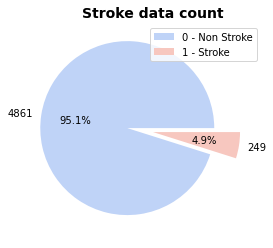

In [5]:
plt.pie((dataset['stroke'].value_counts()),labels=(dataset['stroke'].value_counts()),explode=[0.3,0],autopct='%1.1f%%', colors = ['#bfd3f7','#f7c7bf'])
plt.title('Stroke data count', fontdict={'fontsize': 14}, weight='bold')
plt.legend(['0 - Non Stroke','1 - Stroke'], loc="best")
plt.show()

###### Observations:
- Pie chart for 'Stroke' data count, only 4.9% of 'Stroke' data - highly Imbalanced dataset.

In [6]:
for i in df_obj:
    print(f'============Values in {i}============\n{dataset[i].value_counts()}\n------------------------')

============Values in gender============
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
------------------------
============Values in ever_married============
Yes    3353
No     1757
Name: ever_married, dtype: int64
------------------------
============Values in work_type============
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
------------------------
============Values in Residence_type============
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
------------------------
============Values in smoking_status============
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
------------------------


###### Observations: 
- Unique values in all object datatype columns. For 'gender', to replace the 'Other' type (1 row). 
- For 'Unknown' smoking status, too many records, decide to keep the data. 
- Need to perform label encoding later on.

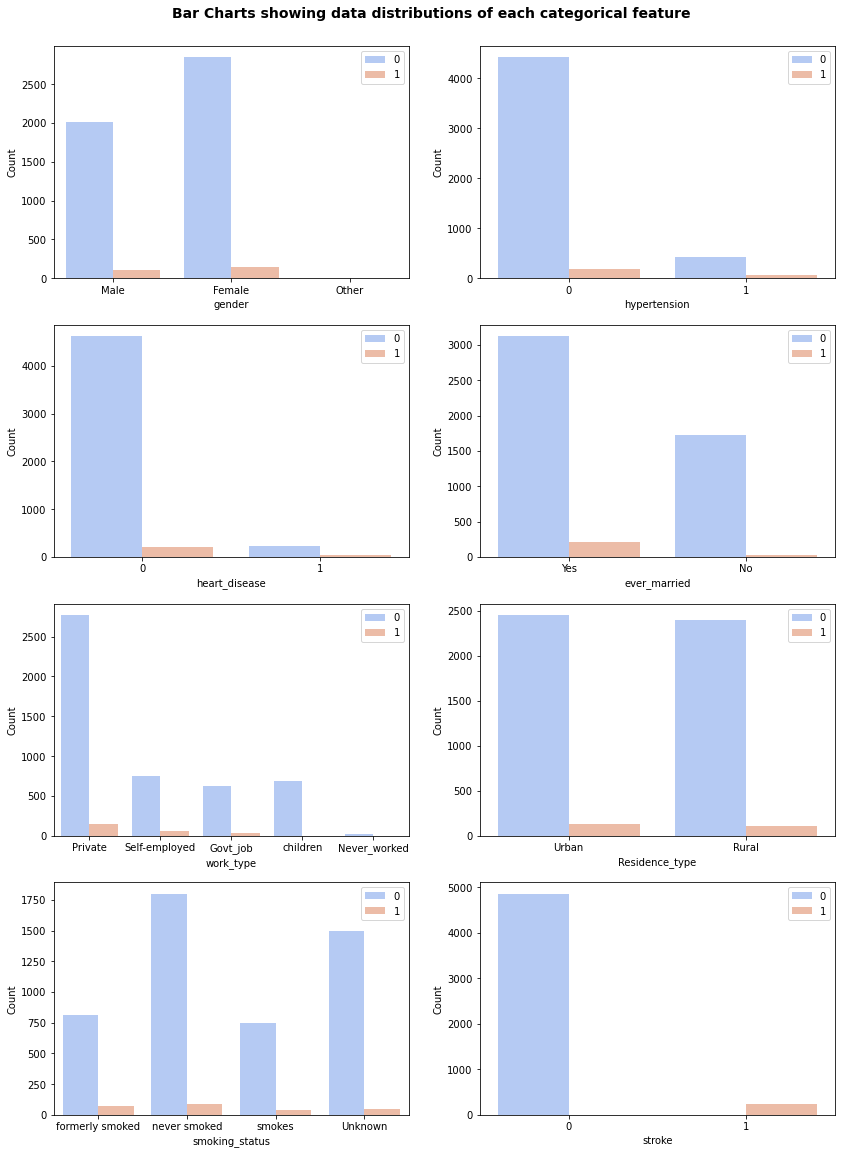

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(14,18))
axs = axs.flatten()
fig.suptitle('Bar Charts showing data distributions of each categorical feature', fontsize=14, weight='bold');
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=dataset, ax=axs[i], hue = dataset['stroke'], palette = 'coolwarm')
    axs[i].set_xlabel(f"{col_name}")
    axs[i].set_ylabel('Count')
    axs[i].legend(loc="upper right")
fig.subplots_adjust(top=0.95)

###### Observations:
- More 'no stroke' data in all features - imbalanced dataset.
- 'gender' - number of Male and Female who has stroke seems similar
- Stroke cases exists for people with and without hypertension.
- Stroke cases exists for people with and without heart disease.
- Married people has more stroke cases than those unmarried.
- Private employees & Self employed seems to experience stroke more than other work_types (may be more stress/ work pressure). 
- Stroke cases for people living in urban and rural areas seems similar.
- People who formerly smoked or still smokers (combined) has more stroke cases then other categories (considering the sample size).

In [8]:
dataset[df_num].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


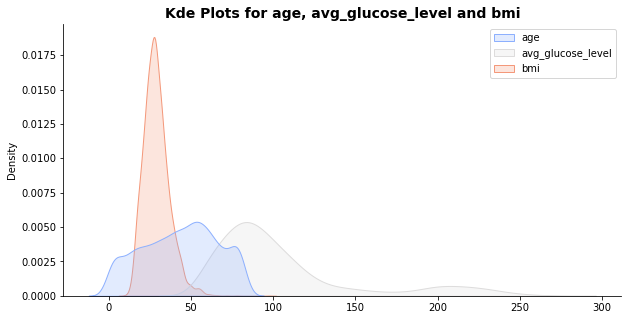

In [9]:
fig, ax = plt.subplots(figsize = (10,5))
sns.kdeplot(data=dataset[df_num],shade=True,palette='coolwarm')
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for age, avg_glucose_level and bmi',fontsize='14',weight='bold');

###### Observations :
- 'age' is distributed between 0 and 100. Mean (43) < Median (45). Need to analyse those data below 20 years old.
- 'avg_glucose_level' is heavily skewed towards right and most of the distribution is between 50-150. Mean (106) > Median (92).
- 'bmi' is between 0 and 50 for most of the people. Mean (29) > Median (28).
- The data is not normally distributed. Check for outliers.

### Step 3: Feature Engineering, Data Cleaning & Data Transformation

###### Action: Drop 'id' column since total number of unique 'id' is same as row count.

In [10]:
print(dataset.id.nunique())
dataset = dataset.drop(columns ='id')

5110


###### Action: 'bmi' column has 201 null values, replace with mean bmi value.

In [11]:
before=dataset.isna().sum()
print(before)
print()
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].mean())
after=dataset.isna().sum()
print(after)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


###### Action: 'gender' column 1 row with 'Other' gender, replace with mode gender.

In [12]:
before=dataset.gender.value_counts()
print(before)
print()
dataset['gender'] = dataset['gender'].replace('Other', list(dataset.gender.mode().values)[0])
after=dataset.gender.value_counts()
print(after)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Female    2995
Male      2115
Name: gender, dtype: int64


###### Action: Perform Label Encoding for 5 'object' datatype columns

In [13]:
Gender = preprocessing.LabelEncoder() 
Ever_married = preprocessing.LabelEncoder() 
Work_type = preprocessing.LabelEncoder() 
Res_type = preprocessing.LabelEncoder() 
S_status = preprocessing.LabelEncoder() 

dataset['gender'] = Gender.fit_transform(dataset['gender']) 
dataset['ever_married'] = Ever_married.fit_transform(dataset['ever_married']) 
dataset['work_type'] = Work_type.fit_transform(dataset['work_type'])
dataset['Residence_type'] = Res_type.fit_transform(dataset['Residence_type']) 
dataset['smoking_status'] = S_status.fit_transform(dataset['smoking_status']) 

for i in df_obj:
    print(f'============Values in {i}============\n{dataset[i].value_counts()}\n------------------------')

============Values in gender============
0    2995
1    2115
Name: gender, dtype: int64
------------------------
============Values in ever_married============
1    3353
0    1757
Name: ever_married, dtype: int64
------------------------
============Values in work_type============
2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64
------------------------
============Values in Residence_type============
1    2596
0    2514
Name: Residence_type, dtype: int64
------------------------
============Values in smoking_status============
2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64
------------------------


###### Action: Do not see high correlations. Only 'age' and 'ever_married' columns have highest correlation of 68% (multicollinearity), drop 'ever_married' column, just use 'age' column.
- Stoke has highest positive correlation with age.

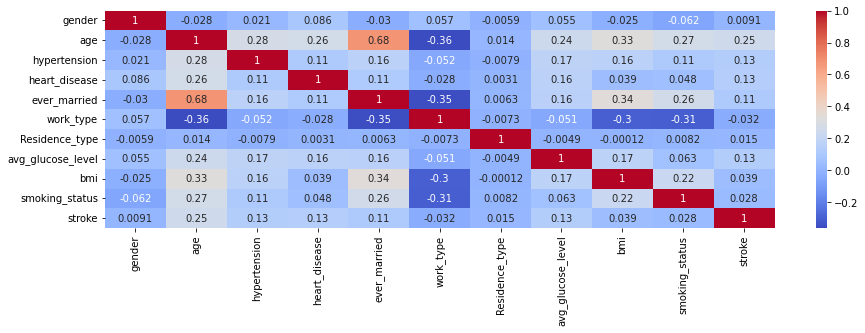

In [14]:
plt.figure(figsize=(15,4))
sns.heatmap(dataset.corr(), annot = True, cmap = 'coolwarm');

In [15]:
dataset = dataset.drop(columns ='ever_married')
dataset.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,3,0,174.12,24.000000,2,1


###### Action - Check/ remove outliers on nominal data.

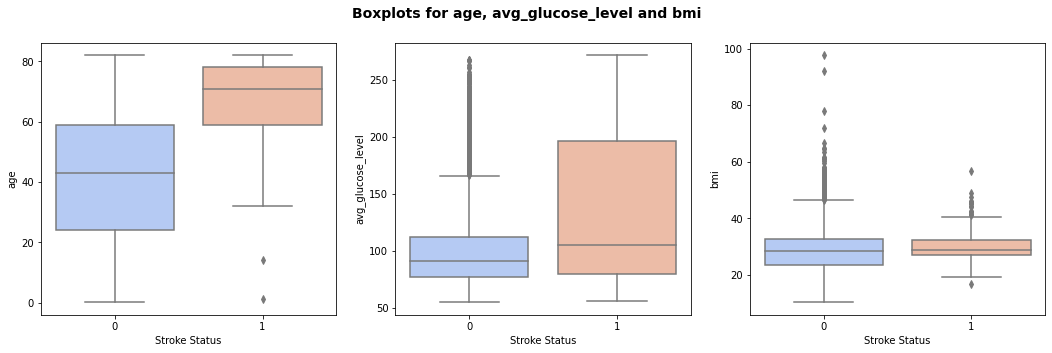

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))
axs = axs.flatten()
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=dataset, ax=axs[i],  palette = 'coolwarm')
    axs[i].set_xlabel("Stroke Status")
    axs[i].set_ylabel(f"{col_name}")
fig.suptitle('Boxplots for age, avg_glucose_level and bmi', fontsize=14, weight='bold');

- 'age' - 1025 records where age is less than or equals to 20 yrs old, 2 records with stroke (1.32 & 14 yrs old). Consider as outliers, delete records.
- 'avg_glucose_level' - those with stroke have higher median glucose level, retain outliers (upper tier) for no stroke records.
- 'bmi' - with stroke, 3 records less than 20 bmi (lower tier outlier), retain data. Bmi index for super obesity is 50-60, replace 77 records where bmi > 50, and set to 50 (max).

In [17]:
children = dataset.loc[dataset['age'] <= 20]
print(children.stroke.value_counts())
a = children.index
dataset = dataset.drop(a)

0    1023
1       2
Name: stroke, dtype: int64


In [18]:
super_obesity = dataset.loc[dataset['bmi'] > 50]
super_obesity['bmi'].shape
dataset['bmi'] = dataset['bmi'].apply(lambda x: 50 if x > 50 else x)

### Step 4: Data Analysis using Visualizations

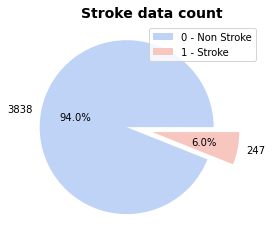

In [19]:
plt.pie((dataset['stroke'].value_counts()),labels=(dataset['stroke'].value_counts()),explode=[0.3,0],autopct='%1.1f%%', colors = ['#bfd3f7','#f7c7bf'])
plt.title('Stroke data count', fontdict={'fontsize': 14}, weight='bold')
plt.legend(['0 - Non Stroke','1 - Stroke'], loc="best")
plt.show()

###### Observations:
- Target data still imbalance, but there is an increase of 1.1% for Stroke data.

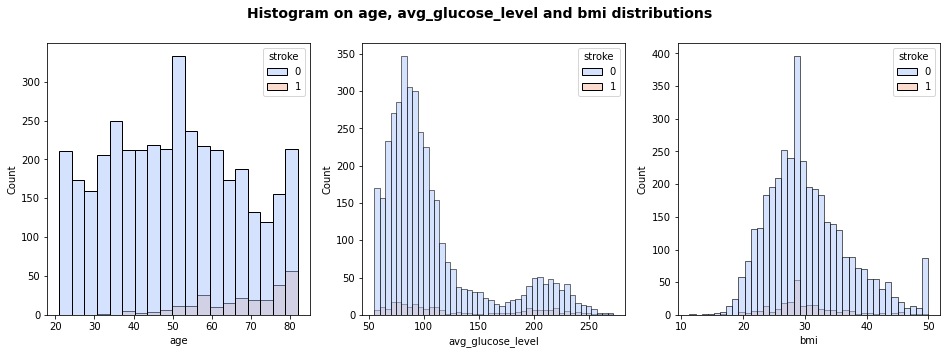

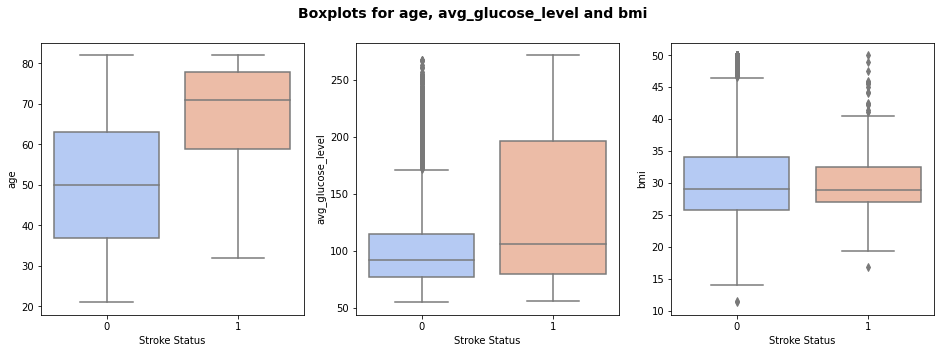

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()
for i, col_name in enumerate(df_num):
    sns.histplot(x=col_name, data=dataset, ax=axs[i], hue = "stroke", palette = 'coolwarm')
fig.suptitle('Histogram on age, avg_glucose_level and bmi distributions', fontsize=14, weight='bold');

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()
for j, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=dataset, ax=axs[j],  palette = 'coolwarm')
    axs[j].set_xlabel("Stroke Status")
    axs[j].set_ylabel(f"{col_name}")
fig.suptitle('Boxplots for age, avg_glucose_level and bmi', fontsize=14, weight='bold');

###### Observations:
- 'age': Lower tier outlier removed. Min age from 0.08 increased to 21 yrs old. More stroke cases as age increases from 60 yrs old.
- 'avg_glucose_level': No change from original data. Charts shows stroke cases below 150 level as well as above 150 level.
- 'bmi': Max value reduced from 97.6 to 50, upper tier outlier reduced. The median for stroke and no stroke are similar.

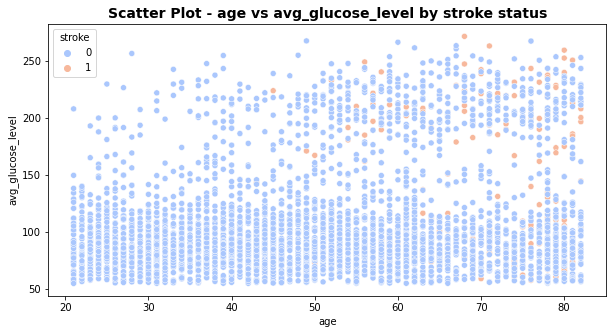

In [21]:
plt.figure(figsize=(10, 5))
plt.title('Scatter Plot - age vs avg_glucose_level by stroke status', fontsize=14, weight='bold')
sns.scatterplot(data=dataset,y=dataset['avg_glucose_level'],x=dataset['age'],hue=dataset['stroke'], palette='coolwarm');

###### Observations:
- More stroke cases at an older age (after 60 years old), with avg_glucose_level over 150.

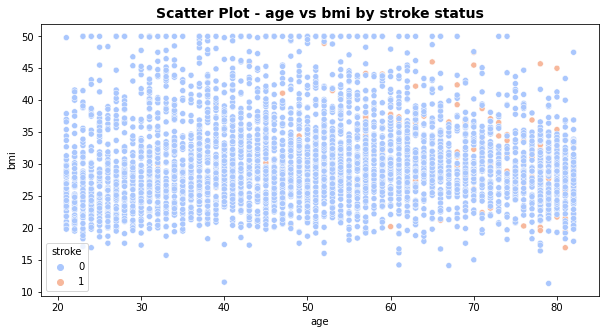

In [22]:
plt.figure(figsize=(10, 5))
plt.title('Scatter Plot - age vs bmi by stroke status', fontsize=14, weight='bold')
sns.scatterplot(data=dataset,y=dataset['bmi'],x=dataset['age'],hue=dataset['stroke'],palette='coolwarm');

###### Observations:
- More stroke cases at an older age (after 60 years old), no distinct cut-off for bmi.

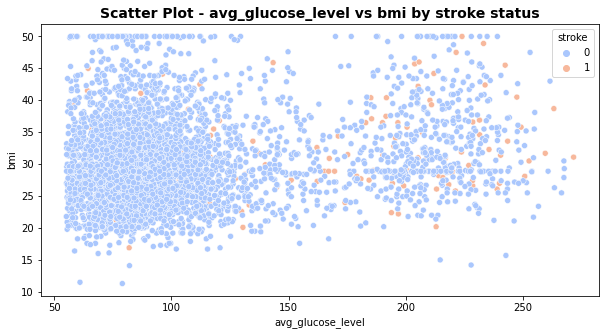

In [23]:
plt.figure(figsize=(10, 5))
plt.title('Scatter Plot - avg_glucose_level vs bmi by stroke status', fontsize=14, weight='bold')
sns.scatterplot(data=dataset,y=dataset['bmi'],x=dataset['avg_glucose_level'],hue=dataset['stroke'],palette='coolwarm');

###### Observations:
- More stroke cases at avg_glucose_level after 150, bmi level varies across.

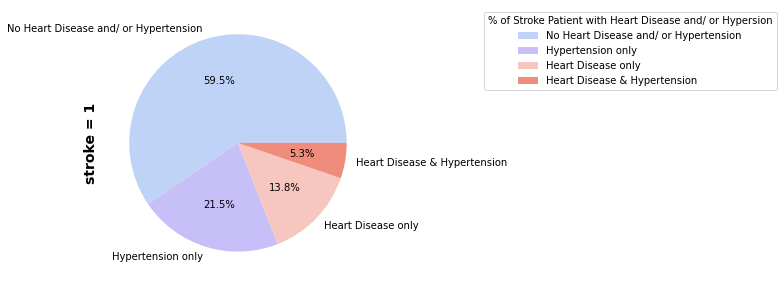

In [24]:
check_disease1=dataset[dataset["stroke"].isin([1])].groupby(["heart_disease", "hypertension"])
check_disease1['stroke'].count().plot.pie(figsize=(5,5),autopct='%1.1f%%',
                                          colors=['#bfd3f7','#c7bff7','#f7c7bf','#ef8c7b'],
                                          labels=["No Heart Disease and/ or Hypertension","Hypertension only",
                                              "Heart Disease only","Heart Disease & Hypertension"])
plt.legend(title='% of Stroke Patient with Heart Disease and/ or Hypersion',loc=1 , bbox_to_anchor=(2.5, 1))
plt.ylabel('stroke = 1', fontweight ='bold', size=14)
plt.show();

###### Observations:
- Almost 60% of the stroke data are from patients without Heart Disease and/ or Hypertension. Stroke may be caused by other factors.
- Hypertension patient are more likely to get stroke than Heart Disease patient.
- Only 5.3% of the stroke data are from patients having both Heart Disease & Hypertension.

### Step 5: Data Preparation

###### Action: Oversample - resolve imbalanced data issue
- 94% of data present no stroke, and is not a big dataset, will oversample the minority class with 'RandomOverSampler'. Basically is to add more samples from under-represented classes.

In [25]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X = dataset.drop(['stroke'], axis=1)
y = dataset['stroke']
X_over, y_over = oversample.fit_resample(X, y)

###### Action: Train-Test-Split (with well-balanced dataset)

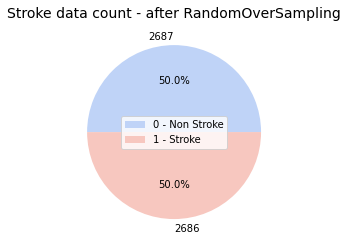

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.30, stratify = y_over, shuffle=True, random_state=42)

plt.pie((y_train.value_counts()),labels=(y_train.value_counts()),autopct='%1.1f%%', colors = ['#bfd3f7','#f7c7bf'])
plt.title('Stroke data count - after RandomOverSampling', fontdict={'fontsize': 14})
plt.legend(['0 - Non Stroke','1 - Stroke'], loc="center")
plt.show()

###### Action: Scale Numeric Columns - age, avg_glucose_level, bmi

In [27]:
scaler=StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train[df_num] = scaler.fit_transform(X_train[df_num])
X_test[df_num] = scaler.transform(X_test[df_num])
X_train.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3473,1,-1.165049,1,0,2,0,-0.174167,1.354820,2
6732,1,0.824830,0,1,0,0,1.741362,-0.277636,2
4975,0,-0.170109,0,0,0,0,0.726126,-0.485694,0
6479,0,1.175985,0,0,3,1,1.899739,-0.597726,2
3457,1,0.122520,0,0,3,0,-0.647532,0.330534,3


### Step 6: Models Selection

#### <span style="color:blue">A. Logistic Regression Model</span>

In [28]:
log = LogisticRegression(max_iter=5000, class_weight="balanced")
log.fit(X_train, y_train)

y_pred_log = log.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred_log))  #true values, predicted
conf_mat_log = metrics.confusion_matrix(y_test, y_pred_log)

              precision    recall  f1-score   support

           0       0.74      0.69      0.72      1152
           1       0.71      0.75      0.73      1151

    accuracy                           0.72      2303
   macro avg       0.72      0.72      0.72      2303
weighted avg       0.72      0.72      0.72      2303



#### <span style="color:blue">B. K Nearest Neighbour (KNN) Model</span>

In [30]:
# find the best 'k'
kVals = range(1, 20)
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []

# training multiple models to find K that returns the best results
for k in kVals:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    
    train_score = classifier.score(X_train, y_train)
    train_f1score = f1_score(y_train, classifier.predict(X_train), average='macro')
    test_score = classifier.score(X_test, y_test)
    test_f1score = f1_score(y_test, classifier.predict(X_test), average='macro')
    
    train_accuracies.append(train_score)
    train_f1_scores.append(train_f1score)
    
    test_accuracies.append(test_score)
    test_f1_scores.append(test_f1score)
    
    print("K = {}, Training (acc:{:.0%}, f1:{:.0%}), Testing (acc:{:.0%}, f1:{:.0%})"\
          .format(k, train_score, train_f1score, test_score, test_f1score))

K = 1, Training (acc:100%, f1:100%), Testing (acc:95%, f1:95%)
K = 2, Training (acc:100%, f1:100%), Testing (acc:95%, f1:95%)
K = 3, Training (acc:96%, f1:96%), Testing (acc:92%, f1:92%)
K = 4, Training (acc:96%, f1:96%), Testing (acc:92%, f1:92%)
K = 5, Training (acc:93%, f1:93%), Testing (acc:89%, f1:89%)
K = 6, Training (acc:93%, f1:93%), Testing (acc:89%, f1:89%)
K = 7, Training (acc:90%, f1:90%), Testing (acc:86%, f1:86%)
K = 8, Training (acc:90%, f1:90%), Testing (acc:85%, f1:85%)
K = 9, Training (acc:88%, f1:88%), Testing (acc:83%, f1:83%)
K = 10, Training (acc:88%, f1:88%), Testing (acc:83%, f1:83%)
K = 11, Training (acc:86%, f1:86%), Testing (acc:81%, f1:81%)
K = 12, Training (acc:86%, f1:86%), Testing (acc:81%, f1:81%)
K = 13, Training (acc:85%, f1:84%), Testing (acc:80%, f1:79%)
K = 14, Training (acc:84%, f1:84%), Testing (acc:79%, f1:78%)
K = 15, Training (acc:83%, f1:82%), Testing (acc:78%, f1:77%)
K = 16, Training (acc:82%, f1:82%), Testing (acc:78%, f1:77%)
K = 17, Train

In [31]:
# k value 1 and 2 gives highest accuracy. Use k = 2 (n_neighbours).
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred_knn))  #true values, predicted
conf_mat_knn = metrics.confusion_matrix(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1152
           1       0.91      1.00      0.95      1151

    accuracy                           0.95      2303
   macro avg       0.96      0.95      0.95      2303
weighted avg       0.96      0.95      0.95      2303



#### <span style="color:blue">C. Random Forest</span>

In [33]:
clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Hyperparameter tuning using K-fold cross validation via Grid Search method
param_grid = {'n_estimators': [50, 100, 200, 300],
              'criterion': ['gini', 'entropy'], 
              'max_depth': [None, 1, 2, 3]}

gs_clf = GridSearchCV(clf,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_clf.fit(X_train, y_train)
print("'{}' gives the best F1-score at: {:.2%}".format(gs_clf.best_params_, gs_clf.best_score_))

'{'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}' gives the best F1-score at: 98.27%


In [34]:
# Use the best estimator returned from machine to train and test the model.
rf = gs_clf.best_estimator_
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred_rf))  #true values, predicted
conf_mat_rf = metrics.confusion_matrix(y_test, y_pred_rf)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1152
           1       0.97      1.00      0.99      1151

    accuracy                           0.98      2303
   macro avg       0.99      0.98      0.98      2303
weighted avg       0.99      0.98      0.98      2303



### Step 7: Evaluate Results
<img src = "ConfusionMatrix.jpg" width = "450">

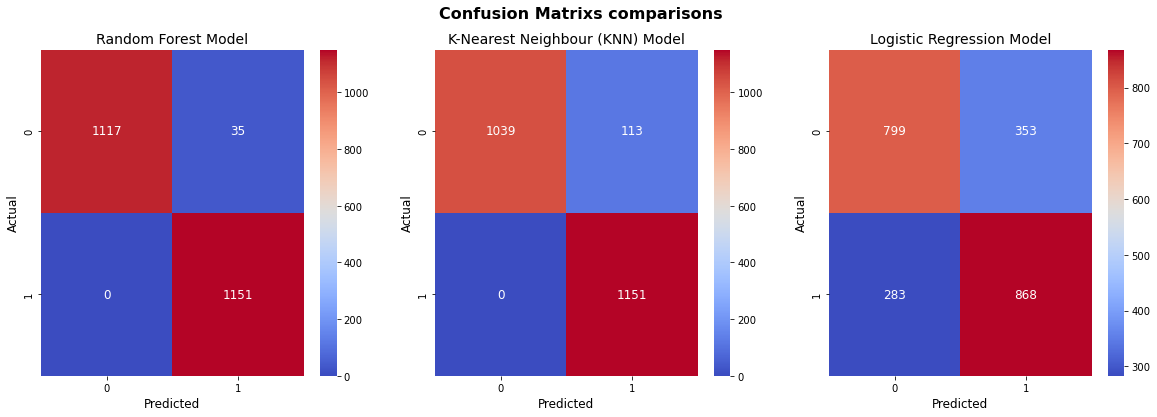

In [36]:
f,(ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,6))
plt.suptitle('Confusion Matrixs comparisons', fontsize=16, weight='bold')
g1 = sns.heatmap(conf_mat_rf, annot  =True, fmt = "d", cmap = "coolwarm", ax=ax1,annot_kws={"size": 12})
g1.set_title('Random Forest Model',fontsize=14)
g1.set_ylabel('Actual',fontsize=12)
g1.set_xlabel('Predicted',fontsize=12)
g2 = sns.heatmap(conf_mat_knn, annot  =True, fmt = "d", cmap = "coolwarm", ax=ax2,annot_kws={"size": 12})
g2.set_title('K-Nearest Neighbour (KNN) Model',fontsize=14)
g2.set_ylabel('Actual',fontsize=12)
g2.set_xlabel('Predicted',fontsize=12)
g3 = sns.heatmap(conf_mat_log, annot  =True, fmt = "d", cmap = "coolwarm", ax=ax3,annot_kws={"size": 12})
g3.set_title('Logistic Regression Model',fontsize=14)
g3.set_ylabel('Actual',fontsize=12)
g3.set_xlabel('Predicted',fontsize=12);

In [37]:
print('The accuracy of the Random Forest model is:', metrics.accuracy_score(y_pred_rf, y_test)) 
print('The accuracy of the KNN model is:', metrics.accuracy_score(y_pred_knn, y_test)) 
print('The accuracy of the Logistic Regression model is:', metrics.accuracy_score(y_pred_log, y_test))

The accuracy of the Random Forest model is: 0.9848024316109423
The accuracy of the KNN model is: 0.9509335649153279
The accuracy of the Logistic Regression model is: 0.7238384715588363


__Results:__ <span style="color:blue">Random Forest Model</span> (using the best n_estimators) gives the best model result. With the highest accuracy%, 0 Type II error (FN) and lowest Type I error (FP). 

With Type II error as 0, model does not mis-classify any Stroke Patient as Non-Stroke patient and resulting patient not getting the required medical attention.

Some mis-classifiation in Type I error - Non-Stroke patient classify as Stroke patient. This 'false alarm' is still acceptable as patient can take extra pre-caution and better care of themself (diet, exercise etc).

<span style="color:blue">K-Nearest Neighbours (KNN) Model</span> also returns high accuracy and 0 Type II error (FN). Type I error count is slightly higher, and sum of TP + TN is also slightly lower than Random Forest Model prediction.

Among the three, <span style="color:blue">Logistic Regression Model</span> gives the worst results, with less than 80% accuracy and high count for Type I & II error.

## Conclusion:

__Random Forest Model__ gives the best results for this Stroke Prediction dataset, with some of the assumptions/ actions during the data cleaning/ transformation process. Below shows 'age', 'avg_glucose_level' and 'bmi' are the top 3 important features for stroke prediction.

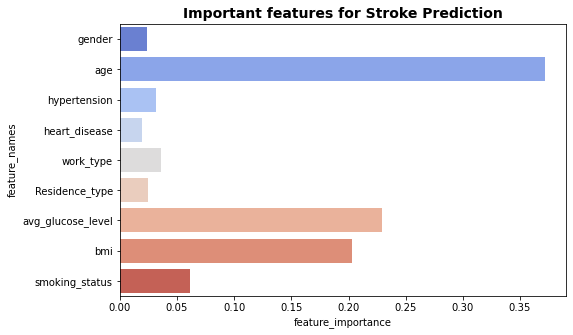

In [38]:
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp['feature_importance'], y=feat_imp['feature_names'], palette = 'coolwarm')
plt.title('Important features for Stroke Prediction', fontsize=14, weight='bold');

Since most people have no symptoms before their stroke, it is important to have regular medical check-ups to identify and treat high blood pressure, cholesterol, diabetes etc before they lead to stroke. When you think someone is having stroke - __<span style="color:red">Think F.A.S.T.!</span>__

__Face:__ Ask the person to smile. Is their face/ mouth drooping?

__Arms:__ Ask the person to hold up both arms. Does one arm drift or drop down?

__Speech:__ Listen to the person speak. Is their speech slurred? Do the words make sense? 

__Time:__ If you or someone else experiences the symptoms of stroke, get medical help a.s.a.p. Make a note of the time when the symptoms started.

<img src = "Fast_image.png" style="width: 1000px; height: 200px">